# Problem 1

## SVD

In [17]:
import numpy as np 
import numpy.linalg as LA
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import csv
import pandas as pd

In [18]:
A = np.array([[0,1,0],[1,0,0]])
print(f"transpose:\n {A.T}")

transpose:
 [[0 1]
 [1 0]
 [0 0]]


In [19]:
## Compute the SVD by computer first 
U,S,VT = LA.svd(A)
print(U)
print(S)
print(VT)

[[1. 0.]
 [0. 1.]]
[1. 1.]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### Computing for V and Sigma

In [20]:
X = A.T @ A 
print(f"The matrix X is :\n{X}")
print(f"The shape of X is {X.shape}")
print(f"The rank of X is {LA.matrix_rank(X)}")
## Computing the eigenvalue and eigenvectors 
ev,eg = LA.eig(X)
print(f"The eigenvalues of X are:\n {ev}")
print(f"The eigenvectors of X are:\n {eg}")

The matrix X is :
[[1 0 0]
 [0 1 0]
 [0 0 0]]
The shape of X is (3, 3)
The rank of X is 2
The eigenvalues of X are:
 [1. 1. 0.]
The eigenvectors of X are:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Computing U 

In [21]:
X = A @ A.T
print(f"The matrix X is :\n{X}")
print(f"The shape of X is {X.shape}")
print(f"The rank of X is {LA.matrix_rank(X)}")
## Computing the eigenvalue and eigenvectors 
ev,eg = LA.eig(X)
print(f"The eigenvalues of X are:\n {ev}")
print(f"The eigenvectors of X are:\n {eg}")

The matrix X is :
[[1 0]
 [0 1]]
The shape of X is (2, 2)
The rank of X is 2
The eigenvalues of X are:
 [1. 1.]
The eigenvectors of X are:
 [[1. 0.]
 [0. 1.]]


### Check the hand-writing result

In [22]:
U = np.array([[1,0,0],[0,1,0]])
S = np.array([[1,0,0],[0,1,0],[0,0,0]])
VT = np.array([[0,1,0],[1,0,0],[0,0,1]])
X = U @ S @ VT
print(f"Does the result same as A ? \n { X==A }")

Does the result same as A ? 
 [[ True  True  True]
 [ True  True  True]]


## Pseudo Inverse

In [23]:
A_pinv = LA.pinv(A)
print(f"The pseudoinverse of A by numpy :\n{A_pinv}")

The pseudoinverse of A by numpy :
[[0. 1.]
 [1. 0.]
 [0. 0.]]


In [24]:
x = A @ A.T
invx = LA.inv(x)
print(invx)
Aplus =  A.T @ invx 
print(f"The pseduo inverse of A is\n {Aplus}")
print(f"Check the result\n{A @ Aplus} ")

[[1. 0.]
 [0. 1.]]
The pseduo inverse of A is
 [[0. 1.]
 [1. 0.]
 [0. 0.]]
Check the result
[[1. 0.]
 [0. 1.]] 


# Problem 2 : Examine the equation

In [25]:
## Generate a random matrix
A = np.random.randint(0,10,size=(2,3))
print(f"The random matrix of A is \n{A}")
F_norm_A = LA.norm(A,ord="fro")
print(f"The F norm of A computed by numpy : \n{F_norm_A}")
U,S,VT = LA.svd(A)
F_norm_S = np.sqrt(np.sum(S**2))
print(f"The F norm of A computed by numpy : \n{F_norm_S}")
print(f"Examine if the equation is valid:\n{F_norm_S == F_norm_A}")

The random matrix of A is 
[[6 9 0]
 [0 4 7]]
The F norm of A computed by numpy : 
13.490737563232042
The F norm of A computed by numpy : 
13.490737563232042
Examine if the equation is valid:
True


# Problem 4

In [26]:
## Load the data
Q4 = pd.read_csv("HW1Q4.csv",header=None)
Q4 = Q4.to_numpy()
print(f"The shape of dataset is {Q4.shape}")
print(f"The dtype of data is {Q4.dtype}")

The shape of dataset is (220, 500)
The dtype of data is float64


In [27]:
## ecnomy singular-value decomposition
U,S,VT = LA.svd(Q4,full_matrices=False)
print(f"The shape of left singular vetors:{U.shape}")
print(f"The shape of right singular vetors:{VT.T.shape}")
print(f"The number of  singular values:{S.shape}")

The shape of left singular vetors:(220, 220)
The shape of right singular vetors:(500, 220)
The number of  singular values:(220,)


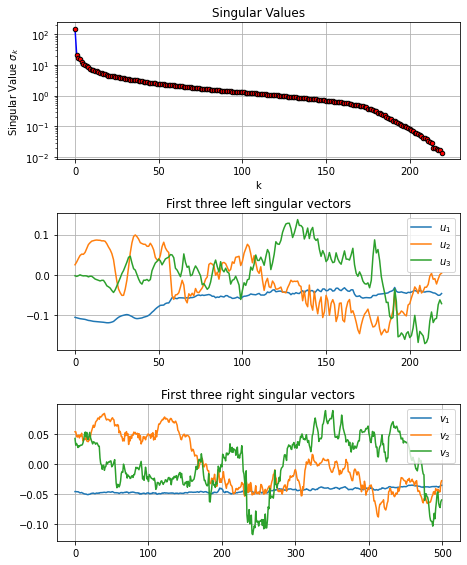

In [28]:
## Plot Singuar values, First three left singular vectors, and First three right vectors

fig,axes = plt.subplots(3,1,figsize =(7,9))

# Singular Values
axes[0].semilogy(S,"-o",c="b",mfc="red",mec="k",markersize=4.5)
axes[0].grid()
axes[0].set_xlabel(r"k")
axes[0].set_ylabel(r"Singular Value ${\sigma}_{k}}$")
axes[0].set_title("Singular Values")

# First 3 Left Singular Vectors 
for i in range(3):
    axes[1].plot(U[:,i],label=r"$u_{}$".format(i+1))
axes[1].grid()
axes[1].legend()
axes[1].set_title("First three left singular vectors")

# First 3 Right Singular Vectors
for i in range(3):
    axes[2].plot(VT[i,:],label=r"$v_{}$".format(i+1))
axes[2].grid()
axes[2].legend(loc="upper right")
axes[2].set_title("First three right singular vectors")

# Adjust the space between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig("HW1Q4")

## Verify 
__The square of the Frobenius norm of the data projected onto the first three singular vectors is equal to the sum of the squares of the first three singular values__

In [29]:
# The first 3 left singular vectors
U3 = U[:,:3].T.astype(np.float64)
# The first 3 right singular vectors
VT3 = VT[:3,:].astype(np.float64)
# The first 3  singular values
S3 = np.diag(S[:3]).astype(np.float64)

print(f"Shape of first 3 left singular matrix {U3.shape}")
print(f"Shape of first 3 right singular matrix {VT3.shape}")
print(f"Shape of Dataset {Q4.shape} ")

# projection of data 
DATA_re = U3 @ Q4 @ VT3.T
Fnorm_DATA = LA.norm(DATA_re,ord="fro") **2
Fnorm_S3= np.sum(S[:3]**2) 
print(f"The F-norm of the data projected onto first 3 singlur vectors is {np.round(Fnorm_DATA,8)}")
print(f"The sum of the squares of first 3 singular values is {np.round(Fnorm_S3,8)}")
print(f"The verify result is {np.round(Fnorm_DATA,8) == np.round(Fnorm_S3,8)}")

Shape of first 3 left singular matrix (3, 220)
Shape of first 3 right singular matrix (3, 500)
Shape of Dataset (220, 500) 
The F-norm of the data projected onto first 3 singlur vectors is 24476.48702358
The sum of the squares of first 3 singular values is 24476.48702358
The verify result is True


# Problem 5

In [30]:
## Load Data
C = np.genfromtxt("hw1Q5C.dat",delimiter=",")
b = np.genfromtxt("hw1Q5b.dat",delimiter=",")
print(f"The shape of C is {C.shape}")
print(f"The shape of b is {b.shape}")

The shape of C is (20, 100)
The shape of b is (20,)


## Take 1: Leverage scipy.optimizer.minimize 

In [31]:
# ## Compression 
# # Define the L1 norm function
# def L1_norm(x):
#     return LA.norm(x,ord=1)
# # set constrains 
# constr = ({"type":"eq","fun":lambda x : C@x -b})
# # express the x = inv(C) @ b
# x0 = LA.pinv(C) @ b  
# # using minimize to yield the result
# # Default
# # res = minimize(fun = L1_norm,x0 = x0,constraints=constr)
# res = minimize(fun = L1_norm,x0 = x0,method="L-BFGS-B")
# ## get the X 
# s_L1 = res.x
# print(f"The shape of result {s_L1.shape}") 
# print(f"The  result \n{s_L1}") 

## Take 2: Leverage __cvxpy__ to solve the falut detection problem

In [32]:
## Leveraging pycvx to solve the problem 
from tabnanny import verbose
import cvxpy as cvx
x = cvx.Variable(100)
objective = cvx.Minimize(cvx.norm(x,1))
b1 = np.expand_dims(b,axis=1)
constrains = [C @ x == b]
prob = cvx.Problem(objective,constrains)
prob.solve(verbose=False)
## Output the value of x 
s_L1 = x.value

In [33]:
s_L1.view()

array([-1.27491927e-11,  1.17593356e-11, -7.37995576e-12, -1.01757286e-12,
       -1.22742206e-13,  9.90892090e-12, -1.95624207e-14, -1.04133405e-11,
        1.09008644e-12,  1.19099637e-12, -3.72756655e-12, -1.32792900e-12,
        8.68531843e-12, -1.31337053e-12, -3.52587714e-12, -9.86860775e-13,
        2.01521617e-12, -4.10000000e-01, -6.66472200e-12,  4.11368097e-12,
        5.32520400e-12, -3.16310824e-12,  2.59951528e-12,  2.07597940e-12,
       -1.86197875e-12,  1.12475152e-11,  1.37589583e-12, -1.64367866e-12,
       -8.56040913e-12,  4.83596874e-13,  1.14598707e-12, -4.59112029e-12,
        1.28073025e-12, -1.02812201e-11,  1.41096661e-11, -3.84856590e-12,
       -4.55148663e-12, -5.21355036e-12,  4.02984258e-12, -9.62148423e-12,
        6.08259490e-12,  4.81029735e-12, -2.19747000e-12, -3.36349354e-12,
        1.37256467e-12, -2.94751222e-12,  7.73308836e-12, -5.05489694e-12,
        4.76830455e-13, -1.46657432e-12, -3.83226824e-13, -4.00814907e-12,
       -1.58702085e-12, -

The Index (begin with 1) of fraudulent coins are :
[18, 55, 71, 99]


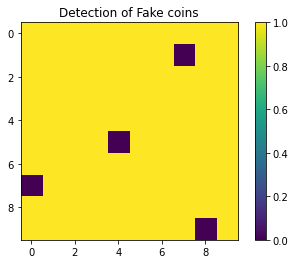

In [46]:
# Reshape the (100,1) result vector into (10,10) matrix 
# Set it as absolute value  
result =  np.abs(s_L1.reshape(10,10)) 

# set threshold of difference to filter the fake coin 
result = result <1e-10


# find which are those fake coins
location = np.argwhere(result == False)
list_Loc = [ i[0]*10 + i[1] +1 for i in location]
print(f"The Index (begin with 1) of fraudulent coins are :\n{list_Loc}")

# heatmap to show the results, the black squares represent the fake coins
imh = plt.imshow(result)
plt.title("Detection of Fake coins")
plt.colorbar(imh)
plt.savefig("HW1Q5")

# Problem 6 

In [35]:
import numpy as np
from numpy import linalg 
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.optimize import minimize

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.exp(1j*omega1*t[tt])+v2*np.exp(1j*omega2*t[tt]) 

In [36]:
print(f"The shape of X is {X.shape}")
print("The rows represent the spatial coordinate y and colomns represent the tempral coordinate ")

The shape of X is (401, 101)
The rows represent the spatial coordinate y and colomns represent the tempral coordinate 


## (a) SVD of X 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


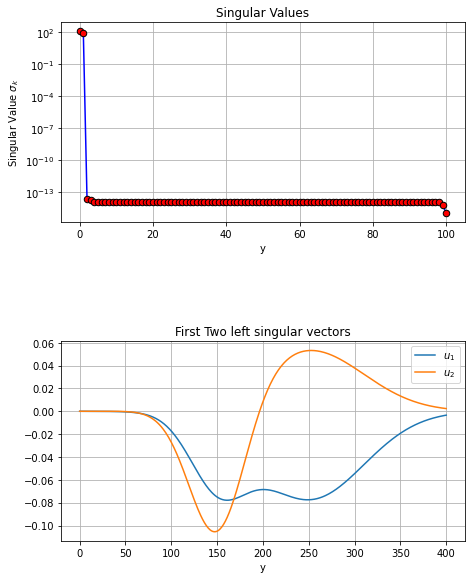

In [37]:
## SVD of X 
U,S,VT = LA.svd(X)


# fig, axes = plt.subplots(2,1,figsize=(7,9))

# Plot singular values
plt.figure(0)
plt.semilogy(S,"-o",c="b",mfc="red",mec="k",markersize=6.5)
plt.grid()
plt.xlabel(r"y")
plt.ylabel(r"Singular Value ${\sigma}_{k}}$")
plt.title("Singular Values")
plt.savefig("H1Q6a_S3")
# Plot First 2 Left Singular Vectors 
plt.figure(1)
for i in range(2):
    plt.plot(U[:,i],label=r"$u_{}$".format(i+1))
plt.grid()
plt.xlabel("y")
plt.legend()
plt.title("First Two left singular vectors")
plt.savefig("H1Q6a_U2")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)
plt.savefig("HW1Q6a")

### The reason why first 2 singular values are much larger than the rest 

In [38]:
## Compute the rank of X 
RANK = LA.matrix_rank(X)
print(f"The rank of matrix X is {RANK}")

The rank of matrix X is 2


+ __It is beacuse the rank of matrix is 2__
+ The rest of singular values are essentially zero

## (b) DMD of X

In [39]:
## DMD of X 
## X'
X_forward = X[:,1::]
## Pseudo inverse of X[:,0:-1]
Xinv = LA.pinv(X[:,0:-1])
print(f"Shape of X prime {X_forward.shape}")
print(f"Shape of X pesduo invers {Xinv.shape}")
## Deriving matrix A 
A = X_forward @ Xinv
print(f"Shape of A is {A.shape}")
print(f"Rank of A {LA.matrix_rank(A)}")
## Eigenvalue Decomposition of A 
LAMB,W = LA.eig(A)

Shape of X prime (401, 100)
Shape of X pesduo invers (100, 401)
Shape of A is (401, 401)
Rank of A 2


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning:

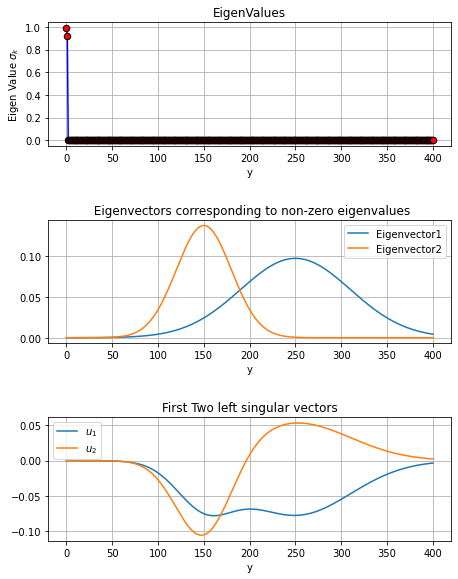

In [40]:
## Plot Eigenvectors corresponds to non-zero Eigenvalue
fig, axes = plt.subplots(3,1,figsize=(7,9))

# Plot eigen values, which shows that the non-zero eigenvalues are the first 2 
axes[0].plot(LAMB,"-o",c="b",mfc="red",mec="k",markersize=6.5)
axes[0].grid()
axes[0].set_xlabel(r"y")
axes[0].set_ylabel(r"Eigen Value ${\sigma}_{k}}$")
axes[0].set_title("EigenValues")

# Plot First 2 Left Singular Vectors 
for i in range(2):
    axes[1].plot(W[:,i],label="Eigenvector{}".format(i+1))
axes[1].grid()
axes[1].set_xlabel("y")
axes[1].legend()
axes[1].set_title(" Eigenvectors corresponding to non-zero eigenvalues")

for i in range(2):
    axes[2].plot(U[:,i],label=r"$u_{}$".format(i+1))
axes[2].grid()
axes[2].set_xlabel("y")
axes[2].legend()
axes[2].set_title("First Two left singular vectors")


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)
plt.savefig("HW1Q6b")

## (c) Eigenvalue VS Parameter

In [41]:
LAMB_D = np.log(LAMB[:2])/dt
lambda_1 = LAMB_D[0]
lambda_2 = LAMB_D[1]
print(f"The imagary part of first non-zero eigenvalue is {lambda_1.imag}")
print(f"The imagary part of second non-zero eigenvalue is {np.round(lambda_2.imag,2)}")


The imagary part of first non-zero eigenvalue is 1.3
The imagary part of second non-zero eigenvalue is 4.1


__The imaginary part of the non-zero eigenvalues are the two frequency which defined the data__

## (d) QR pivoting

In [42]:
import scipy.linalg as LA 
Q,R,P= LA.qr(X,mode="economic",pivoting=True)
P2 = P[:2]
print(f"The Best Two Spatial location to measure this system is {P2[0]} and {P2[-1]}")


The Best Two Spatial location to measure this system is 0 and 56


In [43]:
# # X_sparse = X[P2,:]
# # X_sparse.shape
# Us,Ss,VTs = np.linalg.svd(X,full_matrices=True)
# SNR_sparse = np.max(Ss[P2])/np.min(Ss[P2])
# SNR_org = np.max(S)/np.min(S)
# SNR_sparse,SNR_org